In [17]:
import yt.wrapper as yt

prompt = """seed: {}
Сформулируй вопрос для устного собеседования на должность по машинному обучению относительно <темы>. Отвечай так, как будто ты кандидат, который знает ответ на <оценка>. После этого напиши отзыв к решению и задай новый вопрос, основанный на ответе. Напиши на русском.
Формат блока вопрос-ответ должен быть в виде JSON. Помни, что ответ кандидата (пользователя) может быть с ошибками, поэтому в твоих примерах с низкими оценками они тоже должны быть
Оценка от 1 до 10.
1 - пользователь ответил абсолютно нерелевантную информацию
2 - пользователь ответил нерелевантную информацию, однако упомянул верный факт про машинное обучение
3 - пользователь ответил нерелевантную информацию, однако упомянул верный факт, затрагивающий тему
4 - пользователь ответил на вопрос очень кратно, объяснил поверхностно
5 - пользователь ответил на вопрос кратко, однако указал верные факты, допускаются неточности
6 - пользователь ответил на вопрос, указал верные факты, допускаются неточности. Однако ответ требует дополнений, могут быть упущены какие-то важные аспекты
7 - пользователь ответил на вопрос, указал верные факты, допускаются неточности. Однако ответ требует дополнений, все важные аспекты должны быть упомянуты
8 - пользователь ответил на вопрос, указал верные факты, неточностей быть не должно. Однако ответ требует дополнений - примеров, все важные аспекты должны быть упомянуты
9 - пользователь ответил на вопрос, указал верные факты, неточностей быть не должно. Ответ точен и полон, все важные аспекты должны быть упомянуты, ответ расширает вопрос, а не отвечает напрямую
10 - пользователь ответил на вопрос полностью корректно, дополнений быть не может. Идеальный ответ

Пример 1:
  {{
    'Вопрос': 'Что такое линейная регрессия?',
    'Ответ пользователя': 'Линейная регрессия — это метод предсказания значений.',
    'Комментарий проверяющей системы': 'Ответ пользователя неверный, потому что предоставляет слишком упрощенное и узкое понимание линейной регрессии. Линейная регрессия — это не просто метод предсказания значений, а сложный статистический инструмент, используемый для моделирования и анализа зависимости между переменными. Она включает в себя предположения о линейности, гомоскедастичности и нормальности ошибок, а также может применяться как для простых случаев с одной независимой переменной, так и для сложных моделей с множеством предикторов. Кроме предсказания, линейная регрессия помогает объяснять, как различные факторы влияют на результирующую переменную. Недооценка этих аспектов приводит к неполному пониманию метода и его применения.',
    'Оценка': 3,
    'Новый вопрос': 'Как именно предсказываются значения? Какие значения может предсказывать линейная регрессия?'
  }}

Пример 2:
  {{
    'Вопрос': 'Объясните процесс градиентного спуска в контексте машинного обучения.',
    'Ответ пользователя': 'Градиентный спуск — это оптимизационный алгоритм, который используется для минимизации функции потерь, обновляя веса модели в противоположное направление от градиента функции потерь относительно этих весов.',
    'Комментарий проверяющей системы': 'Ответ пользователя верно определяет суть градиентного спуска, но страдает избыточной лаконичностью и отсутствием ключевых деталей: не объяснены механизм вычисления градиента, роль скорости обучения (learning rate) в обновлении параметров, различия между стохастическим, мини-батч и полным градиентным спуском, а также не упомянуты типичные проблемы (например, застревание в локальных минимумах, выбор оптимального шага). Это делает ответ поверхностным и недостаточным для понимания нюансов алгоритма в контексте реального применения в машинном обучении.',
    'Оценка': 6,
    'Новый вопрос': 'Не могли бы вы подробнее объяснить, как именно скорость обучения (learning rate) влияет на процесс обновления параметров, чем отличаются стохастический, мини-батч и полный градиентный спуск, и какие практические сложности возникают при применении этого алгоритма в реальных задачах машинного обучения?'
  }}

Пример 3:
  {{
    'Вопрос': 'Объясните процесс градиентного спуска в контексте машинного обучения.',
    'Ответ пользователя': 'Я вообще ничего не понял',
    'Комментарий проверяющей системы': 'Ответ пользователя абсолютно нерелевантен и не даёт ответ на вопрос',
    'Оценка': 1,
    'Новый вопрос': 'Что такое градиент в машинном обучении?'
  }}

Пример 4:
  {{
    'Вопрос': 'Что такое Transformer',
    'Ответ пользователя': 'sdfhkj',
    'Комментарий проверяющей системы': 'Ответ пользователя абсолютно нерелевантен и не даёт ответ на вопрос',
    'Оценка': 1,
    'Новый вопрос': 'Что такое нейронная сеть?'
  }}

Объяснение - если пользователь выдает что-то невразумительное или абсолютно неревантное, то оценка 1, новый вопрос должен быть по той же теме, но проще.

ОБЯЗАТЕЛЬНО ответ пользователя должен быть похож на реальный ответ человека во время собеседования, в нем могут быть ошибки

Теперь, опираясь на примеры, сформулируй свой пример по теме '{}'. Оценка {}. Ответ пользователя должен быть на {}-{} предложений"""

In [18]:
themes = [
  "Ансамблирование",
  "Архитектуры глубокого обучения",
  "Выборка признаков",
  "Выявление выбросов",
  "Гиперпараметры",
  "Дискретность данных",
  "Другое",
  "Кластеризация и классификация",
  "Методы уменьшения размерности",
  "Метрики оценки моделей",
  "Нейронные сети",
  "Обработка изображений",
  "Оптимизация моделей",
  "Основы машинного обучения",
  "Предобработка данных",
  "Регуляризация",
  "Рекомендательные системы",
  "Рекуррентные нейронные сети",
  "Сбалансированность данных",
  "Системы управления качеством данных",
  "Теория вероятностей и статистика",
  "Трансформация данных",
  "Анализ временных рядов",
  "Подбор модели",
  "Аугментация данных",
  "Генеративные модели",
  "Интерпретируемость моделей",
  "Линейные модели",
  "Марковские процессы",
  "Метод опорных векторов",
  "NLP",
  "Обучение с подкреплением",
  "Перенос обучения",
  "Распознавание образов",
  "Распределённые вычисления",
  "Семантическая сегментация",
  "Ускорение вычислений",
  "Управление данными",
  "Функции активации",
  "Эволюционные алгоритмы",
  "Байесовские методы",
  "Графовые нейронные сети",
  "Компьютерное зрение",
  "Обработка сигналов",
  "Автокодировщики",
]

In [19]:
len(themes)

45

Text(0, 0.5, 'Количество предложений')

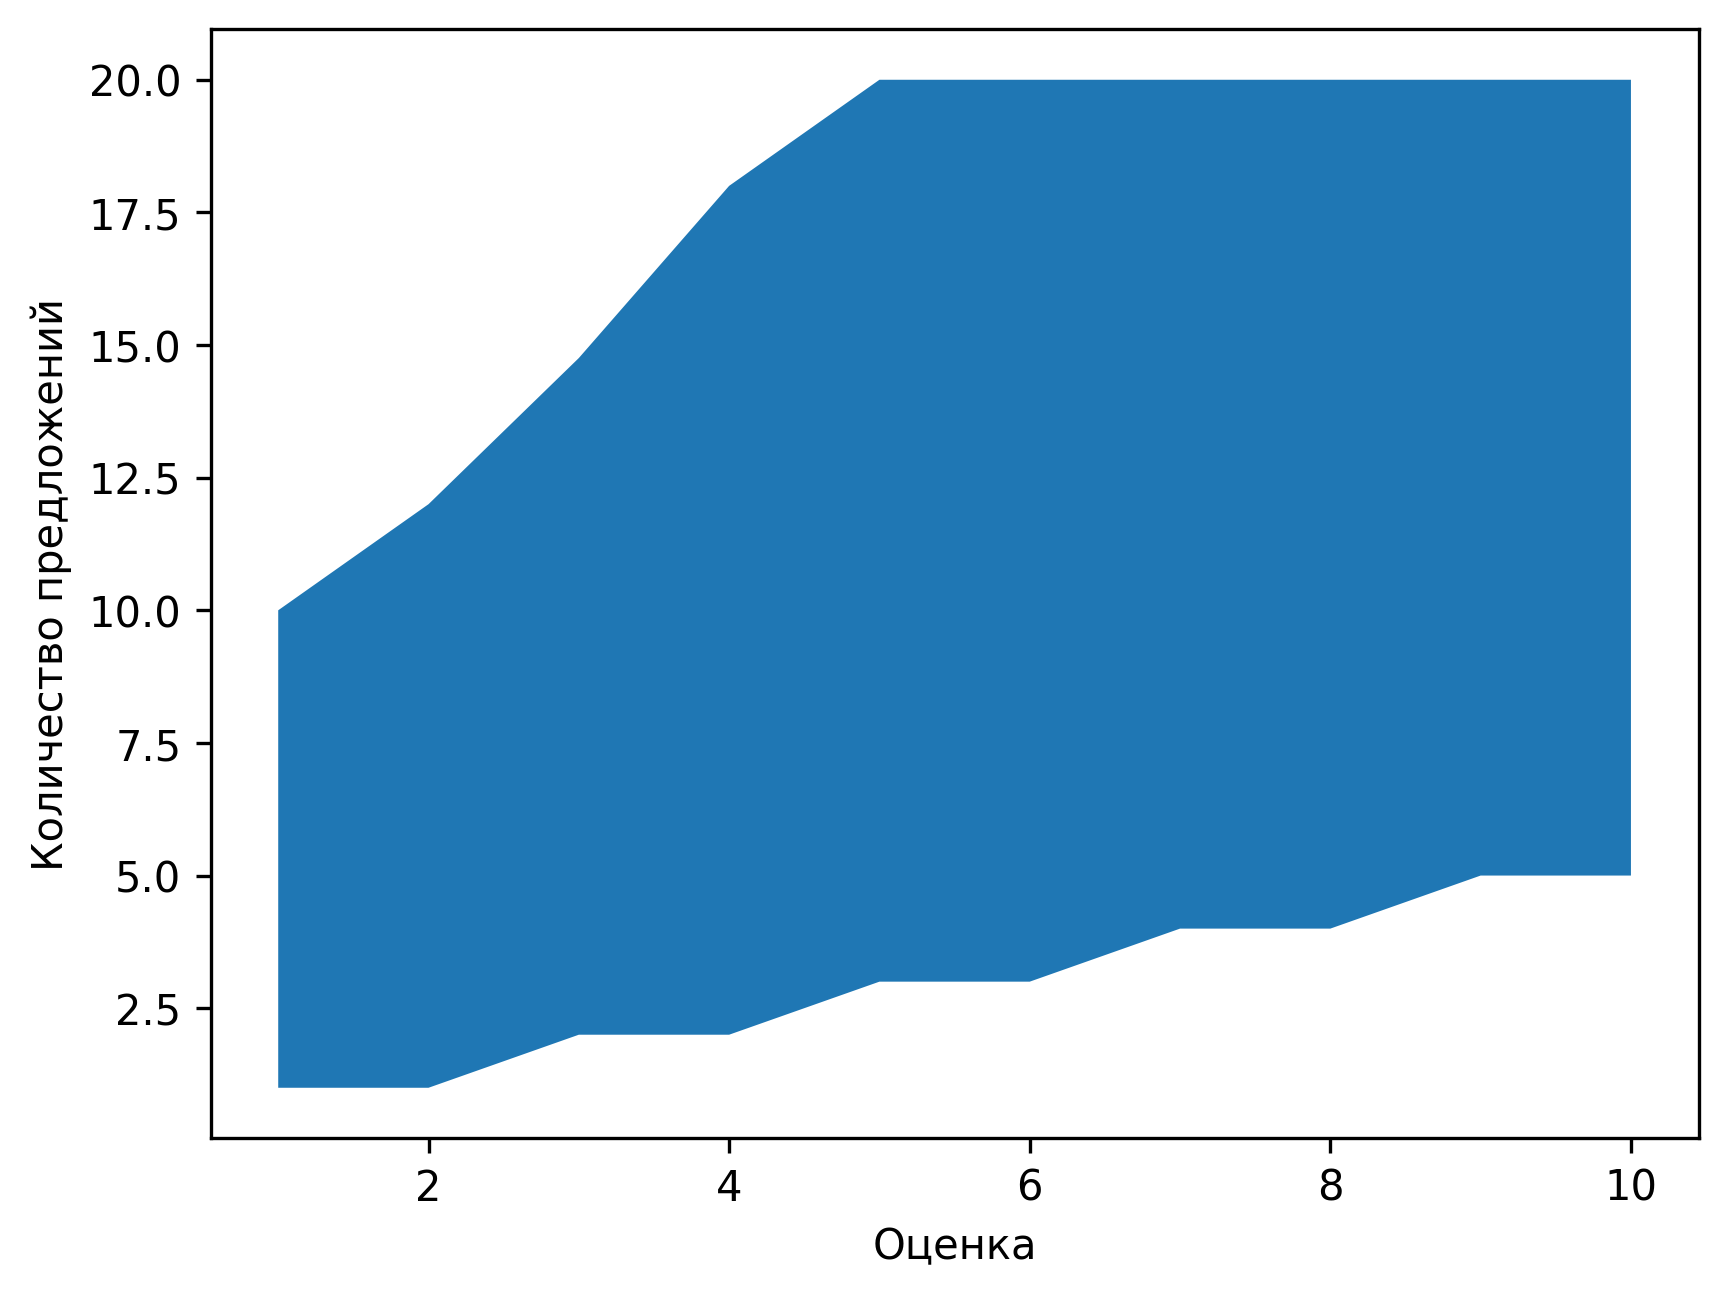

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1]
y1 = [4, 7]
y2 = [7, 10]

# plt.fill_between(x, y1, y2)
x = np.linspace(1, 10, 10)
plt.fill_between(x, np.ceil(0.5 * x), np.minimum(20, x * np.log2(x) + 10))
plt.xlabel("Оценка")
plt.ylabel("Количество предложений")
# plt.plot(x, x * np.log2(x))
# plt.plot(x, 0.2 * x)

In [12]:
import yt.wrapper as yt
import random
import pandas as pd

data = []

def generate(num):
    mean = 5.5
    std_dev = 2.7
    marks = np.random.normal(loc=mean, scale=std_dev, size=num)
    clipped_marks = np.ceil(np.clip(marks, 1, 10))
    for idx in range(num):
        mark = clipped_marks[idx]
        min_length = np.ceil(0.5 * mark)
        max_length = np.ceil(np.minimum(20, mark * np.log2(mark) + 10))
        length = random.randint(min_length, max_length)
        theme_idx = random.randint(0, len(themes) - 1)
        seed = random.randint(0, 1000000)

        question = prompt.format(seed, themes[theme_idx], mark, length, length + 2)
        cur = {"mark": mark, "theme": themes[theme_idx], "length": length, "row_idx": idx, "prompt": question}
        data.append(cur)

        yield cur

yt.config.set_proxy("arnold")
questions_name = "//home/cvtest/cv-dia-test/teasgen/tmp_tables/ml_questions_v2_10k"
yt.write_table(questions_name, generate(10_000))
df = pd.DataFrame(data)
# for x in generate(1):
#     print(x["prompt"])

<Axes: >

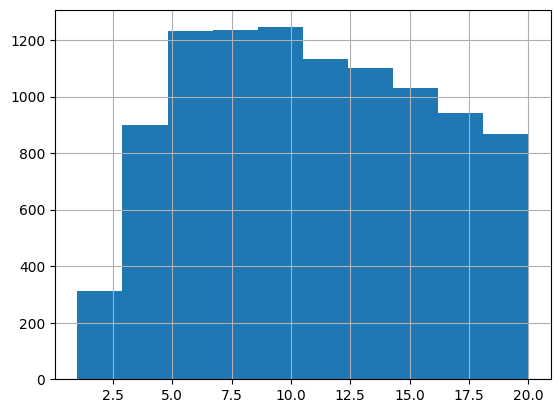

In [16]:
df["length"].hist(xlabel="")

In [ ]:
from json_repair import repair_json
import json

data = []

for idx, row in enumerate(yt.read_table("//home/cvtest/cv-dia-test/teasgen/tmp_tables/ml_questions_v2_10k_with_gpt_answer")):
    s = row["gpt4_answer"].replace("```json", "").replace("```", "")
    good_json_string = repair_json(s)
    parsed_json = json.loads(good_json_string)
    row["Вопрос"] = parsed_json.get("Вопрос", "")
    row["Ответ пользователя"] = parsed_json.get("Ответ пользователя", "")
    row["Комментарий проверяющей системы"] = parsed_json.get("Комментарий проверяющей системы", "")
    row["Новый вопрос"] = parsed_json.get("Новый вопрос", "")
    row.pop("gpt4_answer", None)
    
    data.append(row)

df = pd.DataFrame(data)
df.head()

Text(0, 0.5, 'Частота')

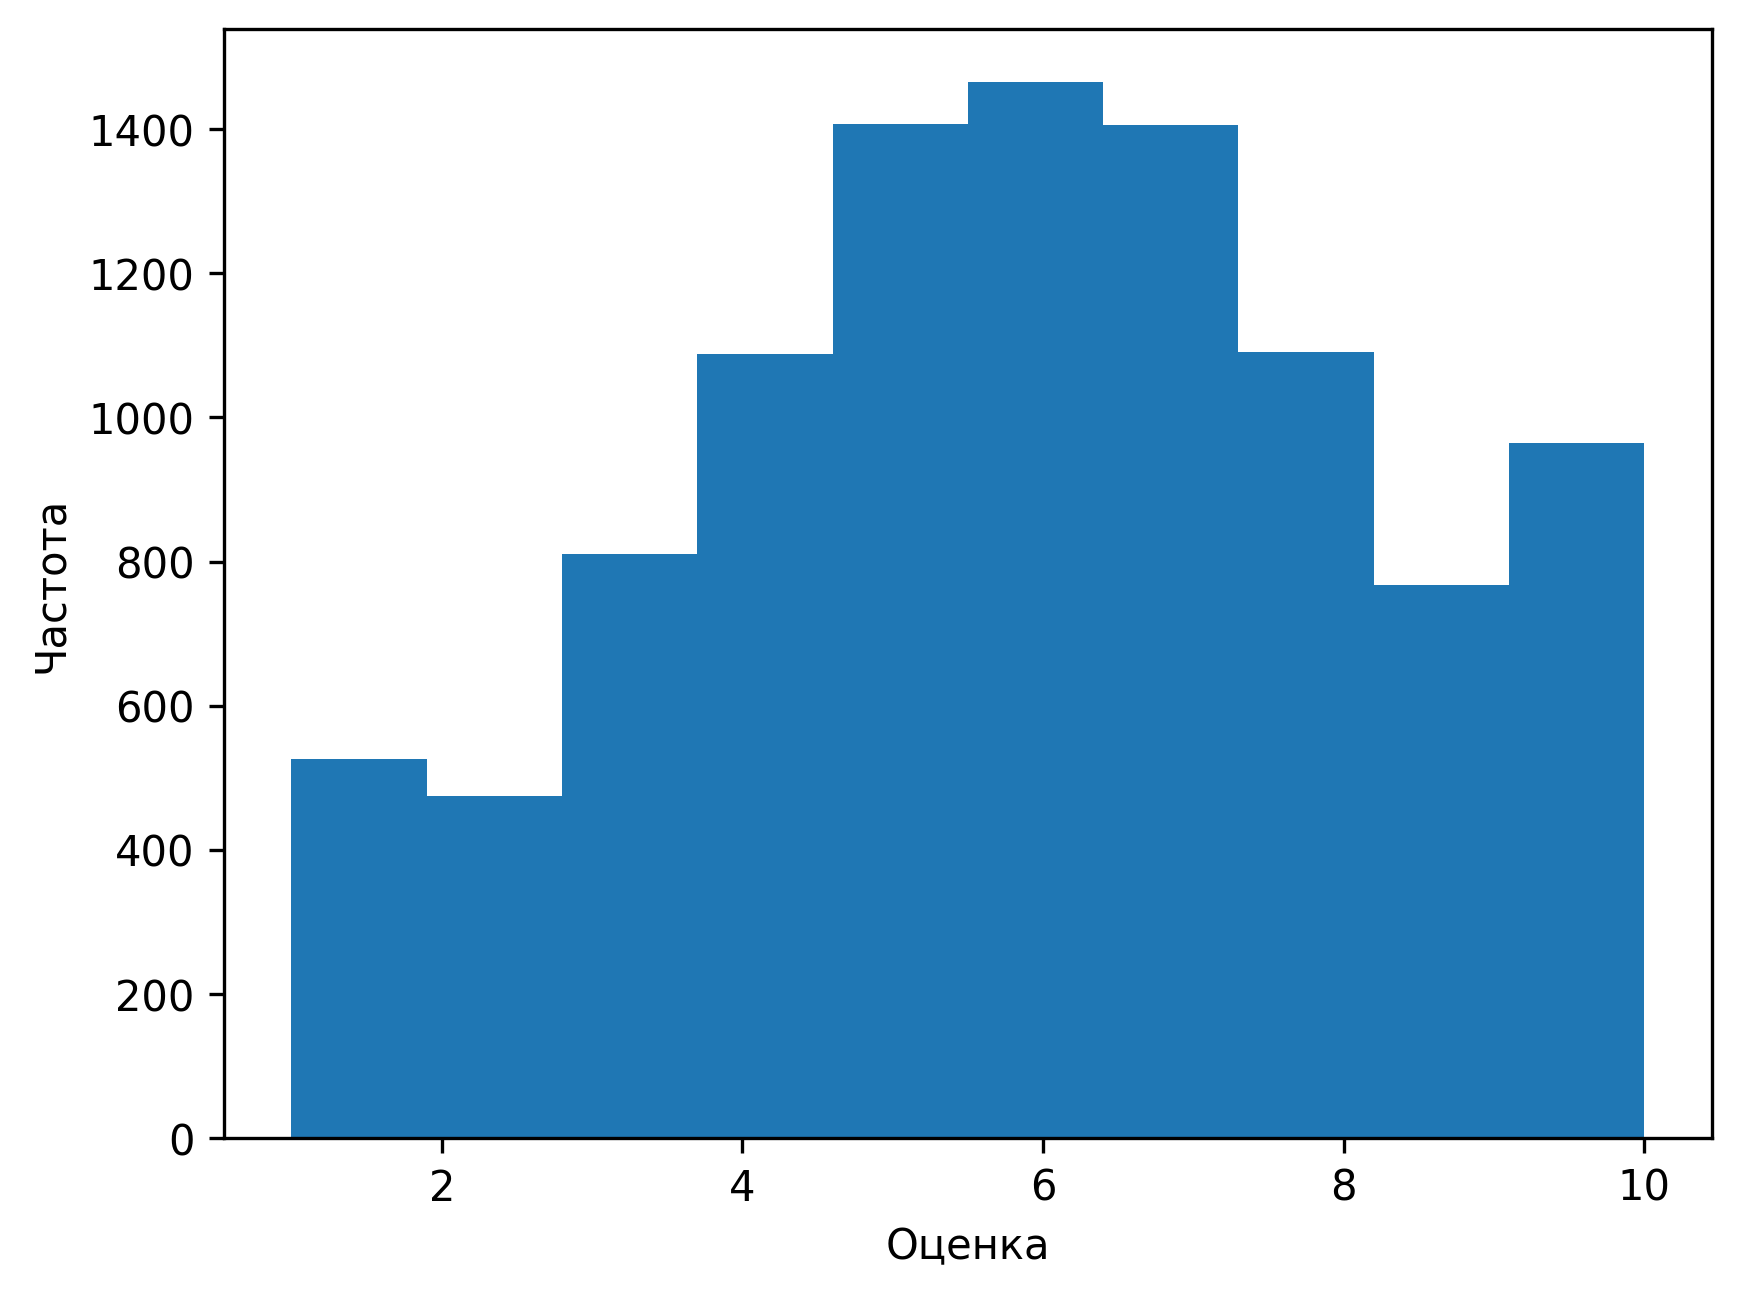

In [27]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ax = pd.read_csv("questions_1k.csv")["mark"].hist(grid=False)
ax.set_xlabel("Оценка")
ax.set_ylabel("Частота")

In [26]:
df.to_csv("questions_1k.csv")

In [11]:
x = [
"Основы машинного обучения",
"Предобработка данных",
"Основы машинного обучения",
"Предобработка данных",
"Предобработка данных",
"Регуляризация",
"Регуляризация",
"Оптимизация моделей",
"Оптимизация моделей",
"Оптимизация моделей",
"Оптимизация моделей",
"Обработка изображений",
"Обработка изображений",
"Сбалансированность данных",
"Обработка изображений",
"Нейронные сети",
"Нейронные сети",
"Рекуррентные нейронные сети",
"Нейронные сети",
"Архитектуры глубокого обучения",
"Рекуррентные нейронные сети",
"Архитектуры глубокого обучения",
"Разделение выборок",
"Гиперпараметры",
"Теория вероятностей и статистика",
"Выявление выбросов",
"Метрики оценки моделей",
"Метрики оценки моделей",
"Метрики оценки моделей",
"Метрики оценки моделей",
"Ансамблирование",
"Дискретность данных",
"Методы уменьшения размерности",
"Методы уменьшения размерности",
"Методы уменьшения размерности",
"Методы уменьшения размерности",
"Системы управления качеством данных",
"Рекомендательные системы",
"Кластеризация и классификация",
"Кластеризация и классификация",
"Метрики сходства",
"Кластеризация и классификация",
"Проблемы и трудности обучаемости",
"Проблемы и трудности обучаемости",
"Выборка признаков",
"Трансформация данных",
"Другое",
"Выборка признаков",
"Другое",
"Другое",
"Другое",
]

for i, t in enumerate(set(themes) - set(x)):
    print(f"{i + 1 + 25}: {t}")

26: Графовые нейронные сети
27: Функции активации
28: Перенос обучения
29: Обработка сигналов
30: Автокодировщики
31: Управление данными
32: Эволюционные алгоритмы
33: Линейные модели
34: Распределённые вычисления
35: Ускорение вычислений
36: Аугментация данных
37: Подбор модели
38: Генеративные модели
39: NLP
40: Распознавание образов
41: Метод опорных векторов
42: Семантическая сегментация
43: Анализ временных рядов
44: Интерпретируемость моделей
45: Обучение с подкреплением
46: Байесовские методы
47: Марковские процессы
48: Компьютерное зрение
